In [4]:
from scipy.special import sph_harm
import numpy  as np
import matplotlib.pyplot as plt
from matplotlib import cm
cmap = cm.gist_gray
import scipy as sp
import math

# 4 A)

In [18]:
def hydrogen_wf(n,l,m,x,y,z):
    '''Will generate a hydrogen energy eigenstate | n , l , m > at the given position 
    also let a_0 = 1'''
    
    #Converting from Spherical to Cartesian
    r = np.sqrt(x**2 + y**2 + z**2)
    theta = np.arccos(z/r)
    phi = np.arctan2(y,x)
    
    
    rho = (2.*r)/n
    # Using python functions to generate the laguerre and spherical harmonics 
    s_harm = sph_harm(m, l, phi, theta) 
    l_poly = sp.special.genlaguerre( n-l-1, 2*l+1 )(rho) 
    
    
    factor = np.sqrt( (2./n)**3*((math.factorial(n-l-1))/(2.*n*math.factorial(n+l))) ) 
    
    wf = (factor)*(np.exp(-rho/2.))*(rho**l)*(s_harm)*(l_poly)
    
    wf = np.nan_to_num(wf) #This stops the code from freaking out over "bad" numbers
    
    return wf

In [19]:
def wv_superpos(n1,l1,m1,n2,l2,m2, x,y,z , alpha ):
    '''The wavefunction we are given in the question is a super position of two states with a relative phase '''
    #Find the wavefunction of each state
    state1 = hydrogen_wf(n1,l1,m1,x,y,z)
    state2 = hydrogen_wf(n2,l2,m2,x,y,z)
    
    #Get the probability density of their superposition
    wv = np.abs( np.sqrt(3/5)*state1  + np.e**(alpha*1j)*np.sqrt(2/5)*state2)**2
    
    return np.nan_to_num(wv)

In [20]:
y = np.linspace(0,0,100)
x = np.linspace(-10,10,100)
z = np.linspace(-10,10,100)

xd,zd = np.meshgrid(x,z)

In [21]:
prob_0 = wv_superpos( 2,0,0,2,1,0, xd,y,zd , 0)
prob_pi6 = wv_superpos( 2,0,0,2,1,0, xd,y,zd , np.pi/6 )
prob_pi4 = wv_superpos( 2,0,0,2,1,0, xd,y,zd , np.pi/4 )
prob_pi3 = wv_superpos( 2,0,0,2,1,0, xd,y,zd , np.pi/3 )
prob_pi2 = wv_superpos( 2,0,0,2,1,0, xd,y,zd , np.pi/2 )
prob_pi = wv_superpos( 2,0,0,2,1,0, xd,y,zd , np.pi )

Text(0.06, 0.5, '$z$')

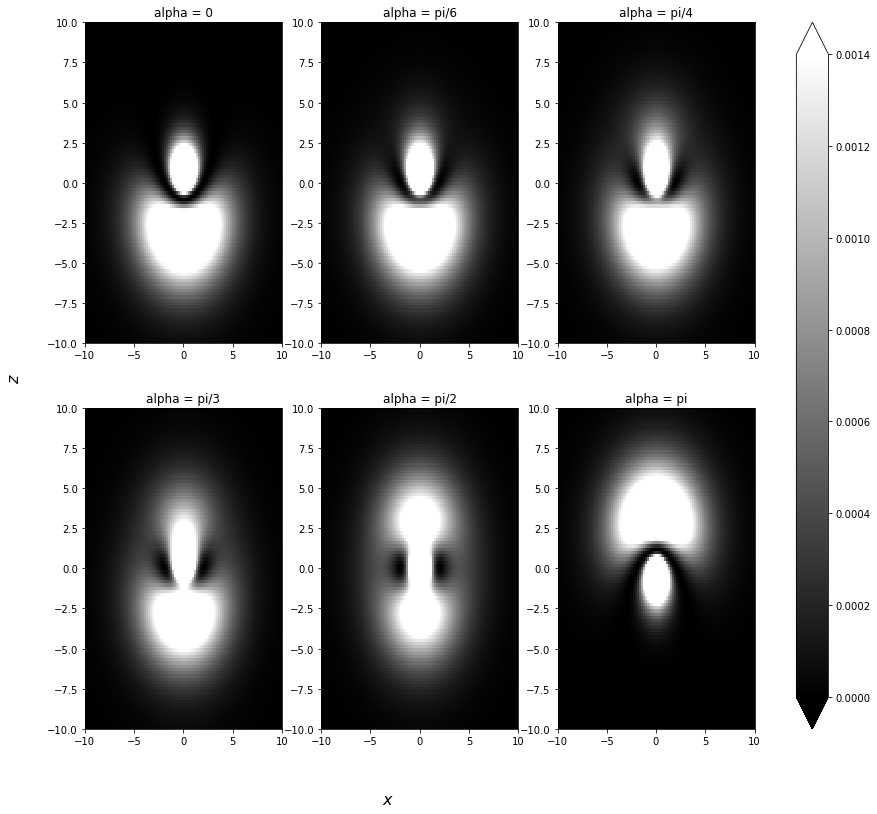

In [221]:
fig, axes = plt.subplots(2,3, figsize=(15,13))

ax = axes[0,0]
cs = ax.pcolor(xd, zd, prob_0 , cmap=cmap , vmin=0,vmax=0.0014)
ax.set_title('alpha = 0')

ax = axes[0,1]
cs = ax.pcolor(xd, zd, prob_pi6 , cmap=cmap, vmin=0,vmax=0.0014 )
ax.set_title('alpha = pi/6')

ax = axes[0,2]
cs = ax.pcolor(xd, zd, prob_pi4 , cmap=cmap , vmin=0,vmax=0.0014)
ax.set_title('alpha = pi/4')

ax = axes[1,0]
cs = ax.pcolor(xd, zd, prob_pi3 , cmap=cmap, vmin=0,vmax=0.0014 )
ax.set_title('alpha = pi/3')

ax = axes[1,1]
cs = ax.pcolor(xd, zd, prob_pi2 , cmap=cmap, vmin=0,vmax=0.0014 )
ax.set_title('alpha = pi/2')

ax = axes[1,2]
cs = ax.pcolor(xd, zd, prob_pi , cmap=cmap, vmin=0,vmax=0.0014 )
ax.set_title('alpha = pi')

cbar = fig.colorbar(cs, ax=axes, extend='both')
fig.text(0.4, 0.045, '$x$', fontsize=16)
fig.text(0.06, 0.5, '$z$', ha='center', va='center', rotation='vertical', fontsize=16)

# 4 B) 

As the relative phase changes the spatial distribution of the probability  density changes.  

As the relative phase between the two states increase from 0 to $\pi$ we see the spatial distribution change such that it reaches a complete reverse of the inital spatial distribution (of the probability  density) when the realtive phase is at $\pi$. We also notice a symmetry when the relative phase is $\pi/2$.   

This would indicate that the relative phase has an effect on measurement.  That is, depending on the relative phase, the likleyhood of finding a particle at a praticular location will change. 

The relative phase is likley causing an interference between the two energy eigenstates which manifests as this observed change in the spatial distribution of probability density. 